In [5]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# Display the first few rows of each dataset
print("Movies Data:")
print(movies.head())

print("\nRatings Data:")
print(ratings.head())

print("\nTags Data:")
print(tags.head())

print("\nLinks Data:")
print(links.head())


Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Tags Data:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445

In [7]:
# Checking for missing values and duplicates in the datasets
movies_missing = movies.isnull().sum()
ratings_missing = ratings.isnull().sum()
tags_missing = tags.isnull().sum()
links_missing = links.isnull().sum()

# Checking for duplicate rows in the datasets
movies_duplicates = movies.duplicated().sum()
ratings_duplicates = ratings.duplicated().sum()
tags_duplicates = tags.duplicated().sum()
links_duplicates = links.duplicated().sum()

# Displaying the results of missing values and duplicates
cleaning_report = {
    "Dataset": ["Movies", "Ratings", "Tags", "Links"],
    "Missing Values": [movies_missing.sum(), ratings_missing.sum(), tags_missing.sum(), links_missing.sum()],
    "Duplicate Rows": [movies_duplicates, ratings_duplicates, tags_duplicates, links_duplicates]
}

cleaning_report_df = pd.DataFrame(cleaning_report)



In [8]:
# Remove rows with missing values from the links dataset
links_cleaned = links.dropna()

# Verifying that the missing values have been removed
links_cleaned_missing = links_cleaned.isnull().sum()

# Displaying the first few rows of the cleaned links dataset
links_cleaned_head = links_cleaned.head()

links_cleaned_missing, links_cleaned_head


(movieId    0
 imdbId     0
 tmdbId     0
 dtype: int64,
    movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0)

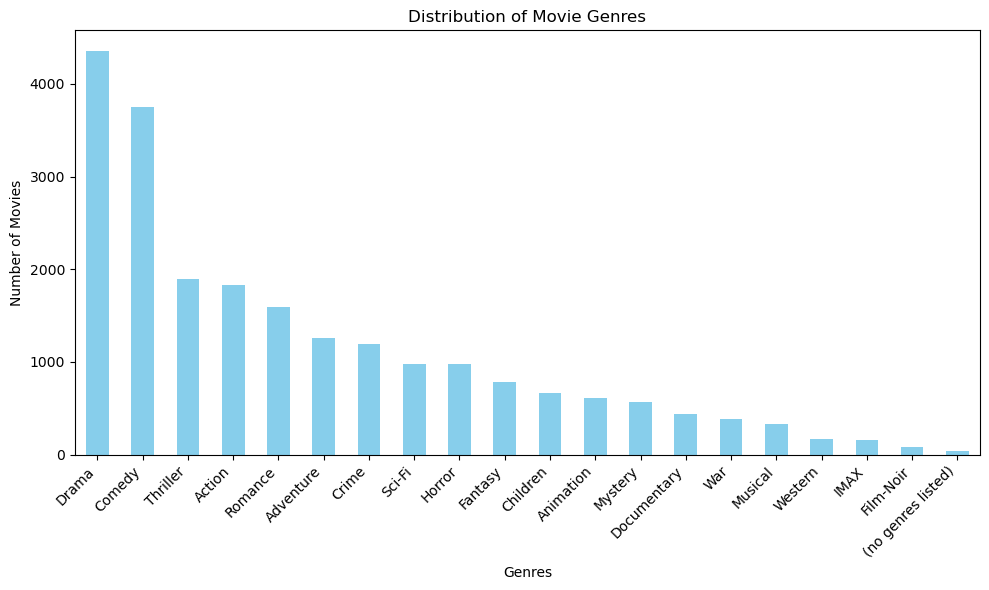

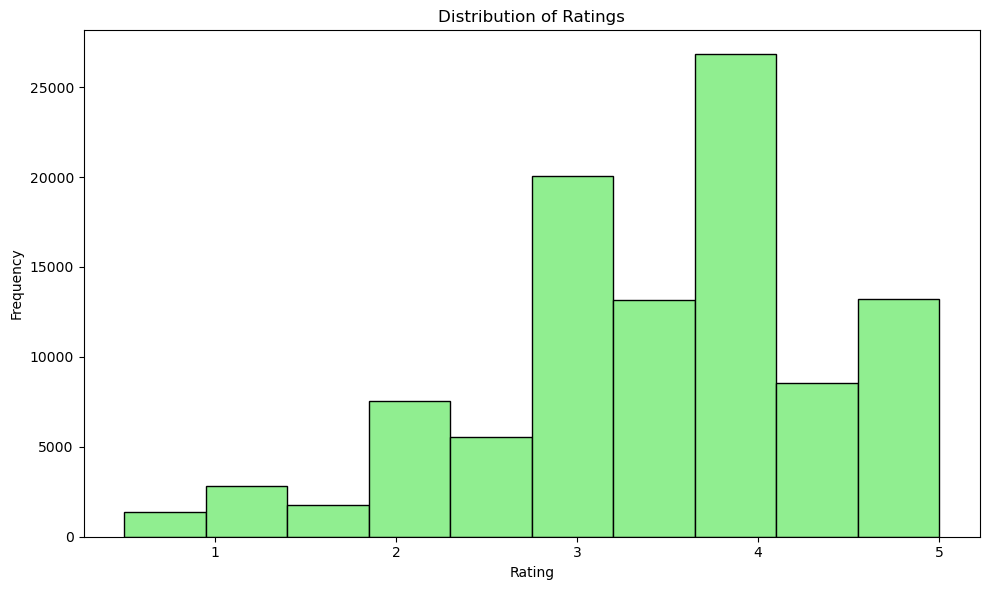

In [9]:
import matplotlib.pyplot as plt

# Splitting genres in the movies dataset and analyzing the distribution
movies['genres_split'] = movies['genres'].str.split('|')
all_genres = movies['genres_split'].explode().value_counts()

# Plotting the distribution of genres
plt.figure(figsize=(10,6))
all_genres.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyzing the distribution of ratings
plt.figure(figsize=(10,6))
ratings['rating'].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


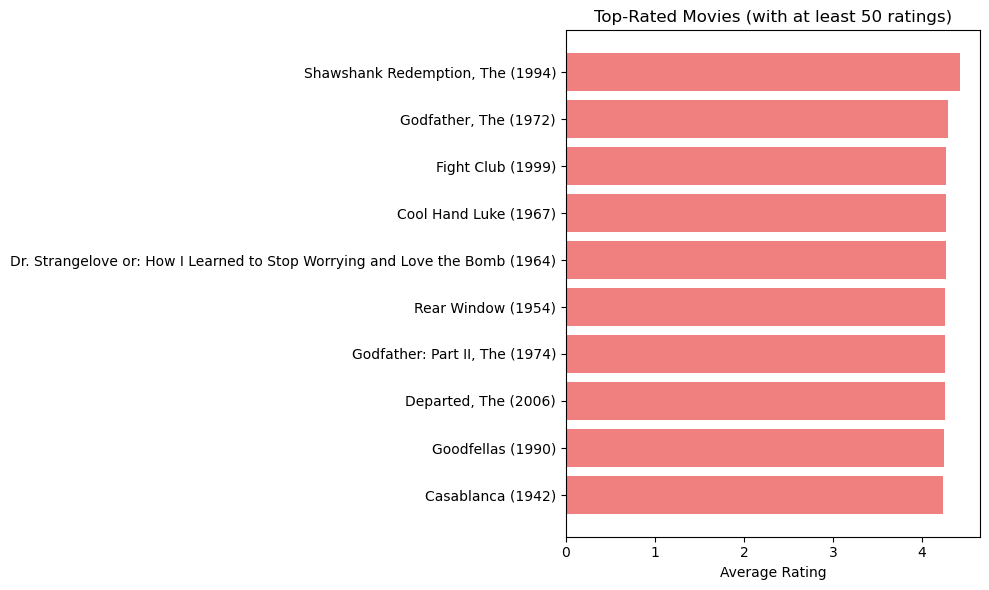

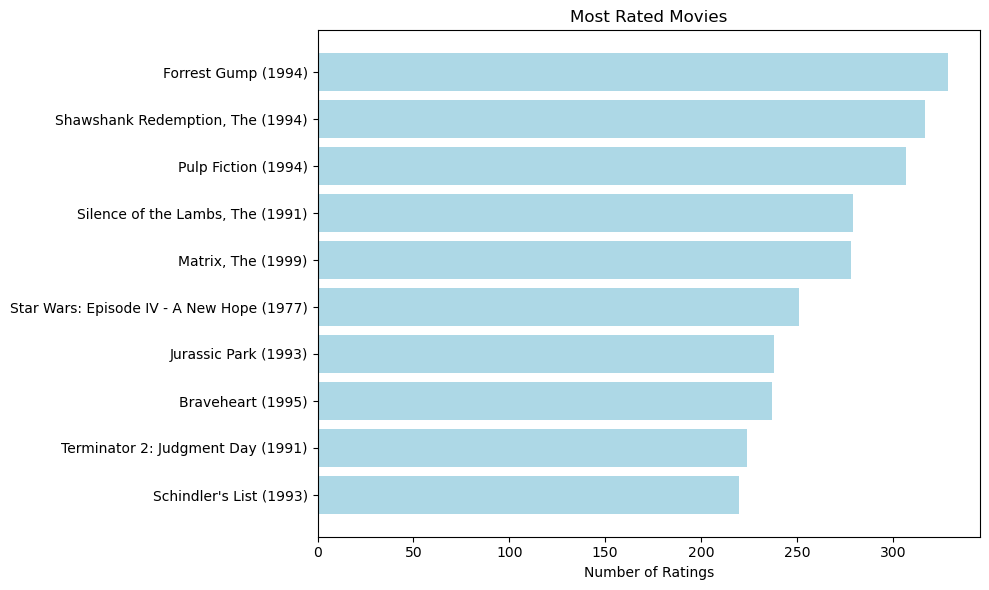

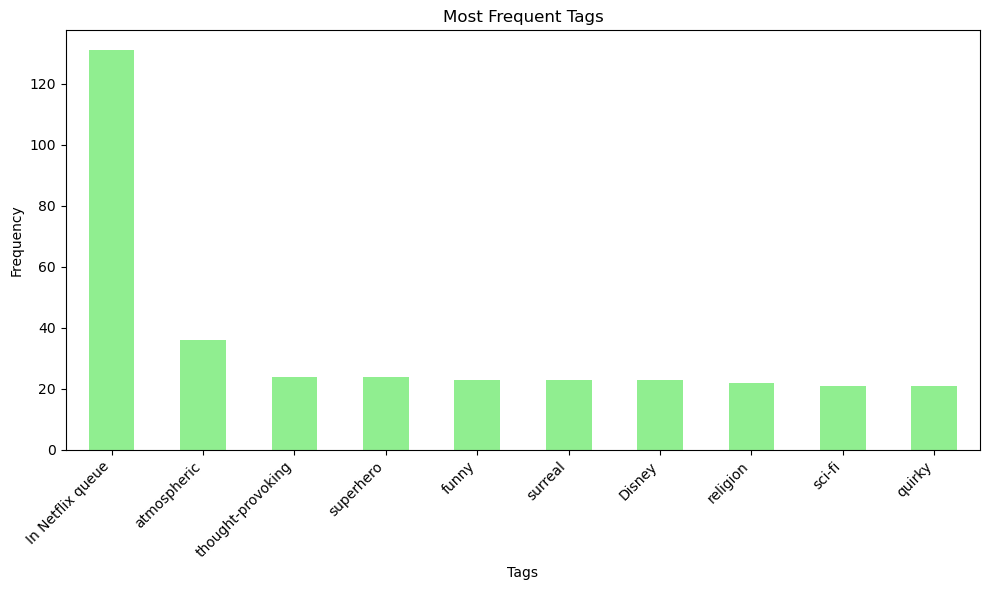

In [10]:
# Grouping ratings by movieId and calculating the average rating and the number of ratings per movie
ratings_summary = ratings.groupby('movieId').agg(
    avg_rating=('rating', 'mean'), 
    num_ratings=('rating', 'count')
).reset_index()

# Filtering movies with at least 50 ratings to avoid skewed results
popular_movies = ratings_summary[ratings_summary['num_ratings'] >= 50]

# Merging with the movies dataset to get the movie titles
popular_movies = popular_movies.merge(movies[['movieId', 'title']], on='movieId')

# Sorting by average rating to get the top-rated movies
top_rated_movies = popular_movies.sort_values(by='avg_rating', ascending=False).head(10)

# Sorting by the number of ratings to get the most popular movies
most_rated_movies = popular_movies.sort_values(by='num_ratings', ascending=False).head(10)

# Plotting the top-rated movies
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['title'], top_rated_movies['avg_rating'], color='lightcoral')
plt.title('Top-Rated Movies (with at least 50 ratings)')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating at the top
plt.show()

# Plotting the most-rated movies
plt.figure(figsize=(10,6))
plt.barh(most_rated_movies['title'], most_rated_movies['num_ratings'], color='lightblue')
plt.title('Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

# Analyzing the most frequent tags
tags_frequency = tags['tag'].value_counts().head(10)

# Plotting the most frequent tags
plt.figure(figsize=(10,6))
tags_frequency.plot(kind='bar', color='lightgreen')
plt.title('Most Frequent Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


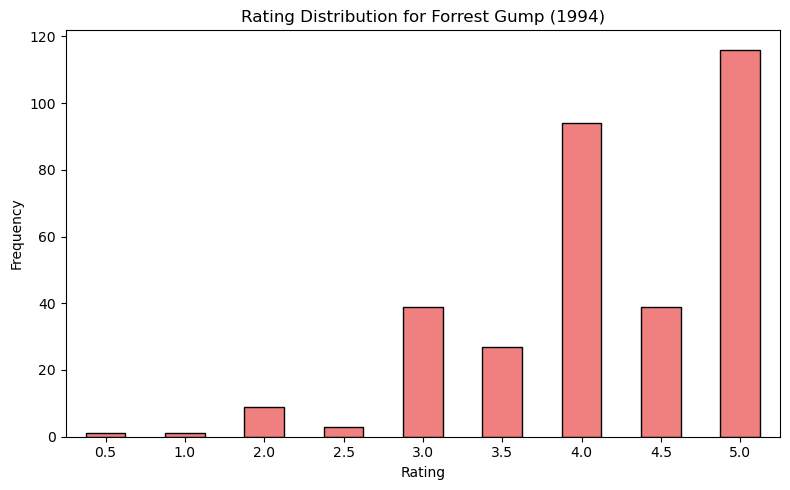

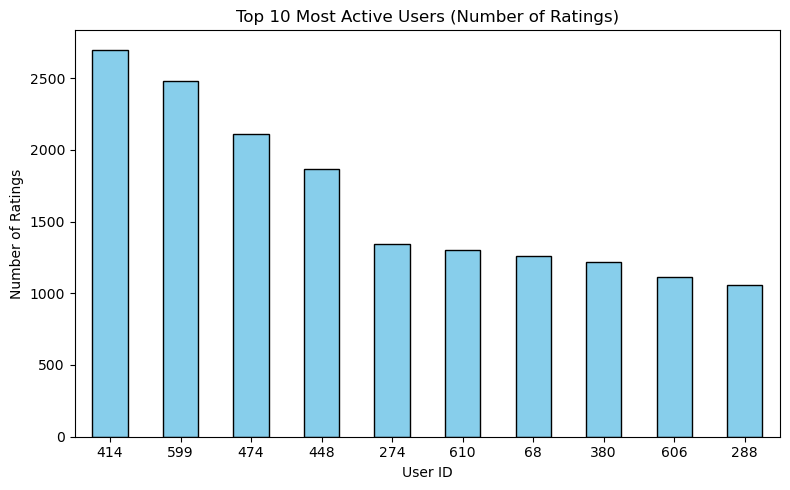

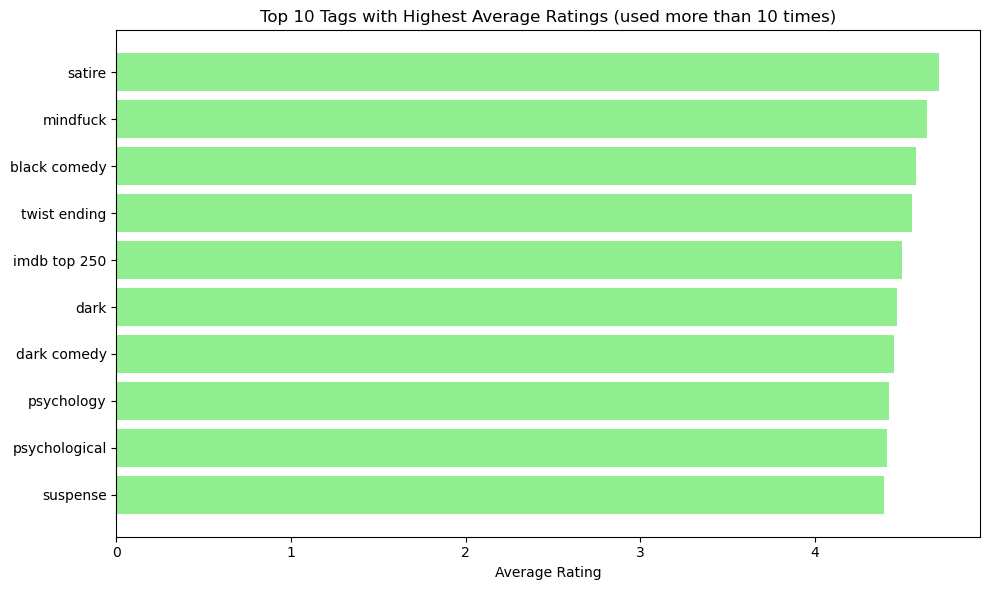

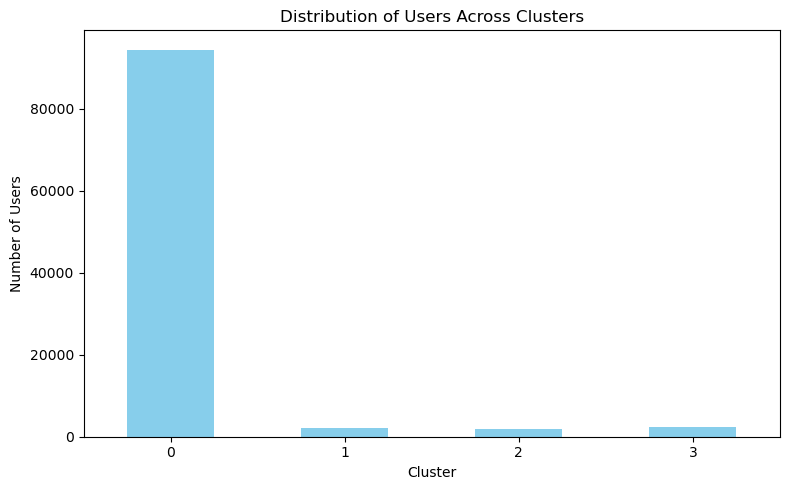

In [12]:
# Step 1: Analyze rating patterns for a specific movie (using the most-rated movie as an example)

# Let's take the most-rated movie from the previous analysis
most_rated_movie_id = most_rated_movies.iloc[0]['movieId']
most_rated_movie_title = most_rated_movies.iloc[0]['title']

# Filter ratings for this specific movie
movie_ratings = ratings[ratings['movieId'] == most_rated_movie_id]

# Plot the rating distribution for this movie
plt.figure(figsize=(8,5))
movie_ratings['rating'].value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title(f'Rating Distribution for {most_rated_movie_title}')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 2: User Behavior Analysis (Identify most active users)
user_rating_counts = ratings['userId'].value_counts().head(10)

# Plot the most active users based on the number of ratings they've provided
plt.figure(figsize=(8,5))
user_rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Active Users (Number of Ratings)')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 3: Tagging Behavior - Explore how frequent tags align with ratings
# Merging tags and ratings dataset on movieId and userId
tags_ratings = pd.merge(tags, ratings, on=['userId', 'movieId'], how='inner')

# Analyzing average rating per tag (only considering tags used more than 10 times)
tags_ratings_summary = tags_ratings.groupby('tag').agg(
    avg_rating=('rating', 'mean'),
    num_tags=('tag', 'count')
).reset_index()

popular_tags_ratings = tags_ratings_summary[tags_ratings_summary['num_tags'] > 10].sort_values(by='avg_rating', ascending=False).head(10)

# Plotting average ratings for popular tags
plt.figure(figsize=(10,6))
plt.barh(popular_tags_ratings['tag'], popular_tags_ratings['avg_rating'], color='lightgreen')
plt.title('Top 10 Tags with Highest Average Ratings (used more than 10 times)')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Data Preparation (creating the user-item matrix)
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Step 2: Scaling the data for KMeans clustering
scaler = StandardScaler()
user_item_matrix_scaled = scaler.fit_transform(user_item_matrix)

# Step 3: Applying KMeans to cluster users based on their rating patterns
kmeans = KMeans(n_clusters=4, random_state=0)
user_clusters = kmeans.fit_predict(user_item_matrix_scaled)

# Step 4: Creating a DataFrame with userId and their cluster labels
user_clusters_df = pd.DataFrame({
    'userId': user_item_matrix.index,
    'cluster': user_clusters
})

# Step 5: Merging the cluster labels back into the ratings DataFrame
ratings_with_clusters = pd.merge(ratings, user_clusters_df, on='userId')

# Now you can proceed with further analysis using the `ratings_with_clusters` DataFrame.
# Example: Visualizing the distribution of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ratings_with_clusters['cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Users Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


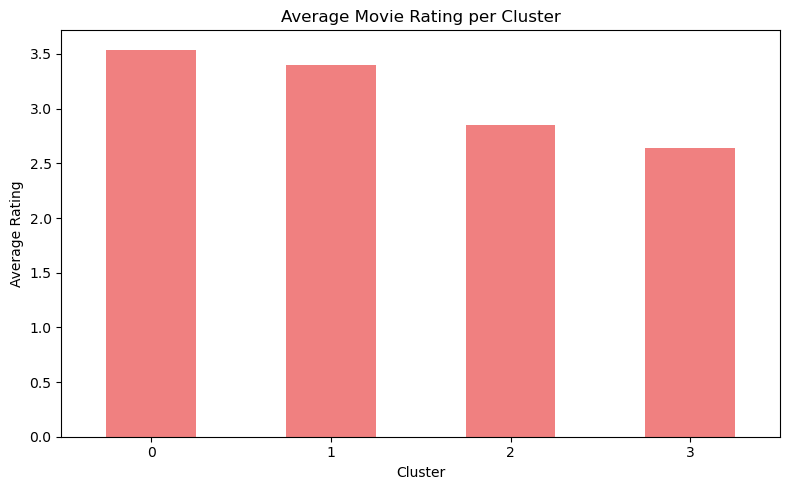

<Figure size 1000x600 with 0 Axes>

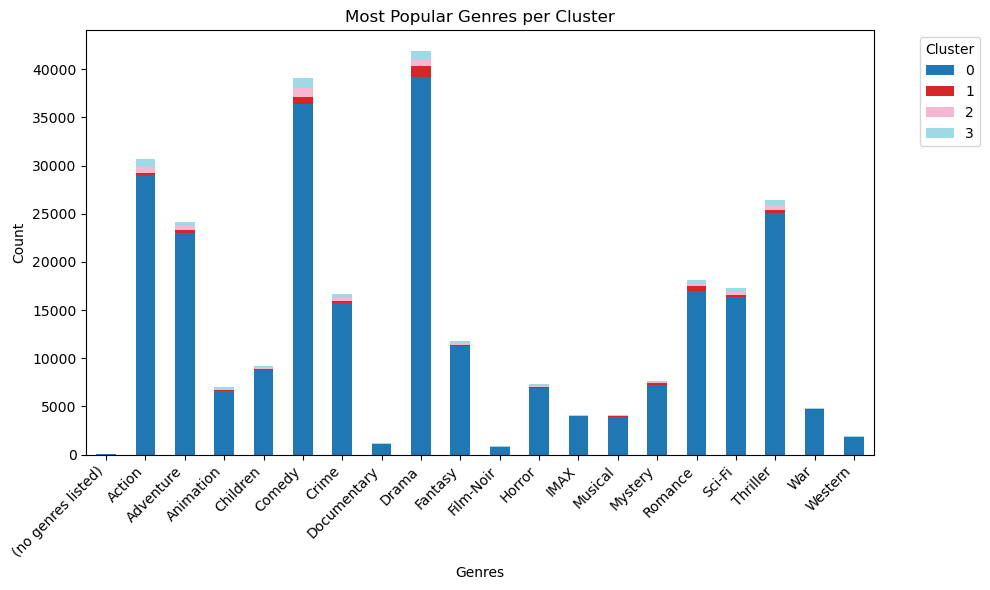

cluster,0,1,2,3
movieId,,,,
1,212,1,1,1
2,107,1,1,1
3,50,0,1,1
4,7,0,0,0
5,47,1,1,0


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Preparation (creating the user-item matrix)
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Step 2: Scaling the data for KMeans clustering
scaler = StandardScaler()
user_item_matrix_scaled = scaler.fit_transform(user_item_matrix)

# Step 3: Applying KMeans to cluster users based on their rating patterns
kmeans = KMeans(n_clusters=4, random_state=0)
user_clusters = kmeans.fit_predict(user_item_matrix_scaled)

# Step 4: Converting user_clusters (numpy array) into a DataFrame
user_clusters_df = pd.DataFrame({
    'userId': user_item_matrix.index,  # Index is userId
    'cluster': user_clusters           # Cluster labels from KMeans
})

# Step 5: Merging the cluster labels back into the ratings DataFrame
ratings_with_clusters = pd.merge(ratings, user_clusters_df, on='userId')

# Step 6: Analyze the average rating per cluster
cluster_avg_rating = ratings_with_clusters.groupby('cluster')['rating'].mean()

# Step 7: Analyze popular genres per cluster
# Merging with the movies dataset to get genre information
ratings_with_clusters = pd.merge(ratings_with_clusters, movies[['movieId', 'genres']], on='movieId')

# Splitting genres and associating them with clusters
ratings_with_clusters['genres_split'] = ratings_with_clusters['genres'].str.split('|')
cluster_genres = ratings_with_clusters.explode('genres_split')

# Counting the genres per cluster
popular_genres_per_cluster = cluster_genres.groupby(['cluster', 'genres_split']).size().unstack(fill_value=0)

# Step 8: Analyze the most rated movies per cluster
most_rated_movies_per_cluster = ratings_with_clusters.groupby(['cluster', 'movieId']).size().unstack(fill_value=0)

# Plotting the average rating per cluster
plt.figure(figsize=(8,5))
cluster_avg_rating.plot(kind='bar', color='lightcoral')
plt.title('Average Movie Rating per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting the most popular genres for each cluster (top 5 genres per cluster)
plt.figure(figsize=(10,6))
popular_genres_per_cluster.T.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10,6))
plt.title('Most Popular Genres per Cluster')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Displaying the top 5 most rated movies for each cluster
most_rated_movies_per_cluster.T.head()


In [17]:
# Identifying the cluster that gives the lowest average rating
lowest_rating_cluster = cluster_avg_rating.idxmin()
lowest_rating_value = cluster_avg_rating.min()

lowest_rating_cluster, lowest_rating_value


(3, 2.6420500403551253)

In [18]:
# Step 1: Analyzing the preferred genres for Cluster 1
cluster_1_genres = popular_genres_per_cluster.loc[1].sort_values(ascending=False).head(5)

# Step 2: Analyzing the most-rated movies for Cluster 1
cluster_1_most_rated_movies = most_rated_movies_per_cluster.loc[1].sort_values(ascending=False).head(5)

cluster_1_genres, cluster_1_most_rated_movies


(genres_split
 Drama        1173
 Comedy        769
 Romance       510
 Thriller      349
 Adventure     264
 Name: 1, dtype: int64,
 movieId
 1       1
 3992    1
 3965    1
 3966    1
 3967    1
 Name: 1, dtype: int64)

In [19]:
# Retrieving movie details for the most-rated movies by Cluster 1
cluster_1_movie_ids = [1, 3034, 96110, 96079, 95875]

# Filtering the movies dataset for these movieIds
cluster_1_movies_details = movies[movies['movieId'].isin(cluster_1_movie_ids)]

# Displaying the movie titles and genres for these movieIds
cluster_1_movies_details[['movieId', 'title', 'genres']]


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2287,3034,Robin Hood (1973),Adventure|Animation|Children|Comedy|Musical
7948,95875,Total Recall (2012),Action|Sci-Fi|Thriller
7955,96079,Skyfall (2012),Action|Adventure|Thriller|IMAX
7957,96110,"Campaign, The (2012)",Comedy


In [3]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Step 1: Load the Data
# Assuming the data is stored in CSV files as per the MovieLens dataset

movies = pd.read_csv('movies.csv')   # Replace with your file path
ratings = pd.read_csv('ratings.csv') # Replace with your file path

# Step 2: Data Preparation
# Create the user-movie matrix (ratings matrix) for collaborative filtering
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Step 3: Matrix Factorization using SVD
# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=20, random_state=0)
svd_matrix = svd.fit_transform(user_movie_matrix)

# Step 4: User Similarity Calculation
# Calculate the cosine similarity between users
user_similarity = np.dot(svd_matrix, svd_matrix.T)

# Step 5: Define a function to recommend movies for a user based on similar users
def recommend_movies(user_id, num_recommendations=10):
    # Find the index of the user in the user_movie_matrix
    user_index = user_movie_matrix.index.get_loc(user_id)
    
    # Sort the similarity scores and find the top 5 similar users
    similar_users = np.argsort(-user_similarity[user_index])[1:6]
    
    # Get the user IDs of the similar users
    similar_user_ids = user_movie_matrix.index[similar_users]
    
    # Get the ratings of similar users
    similar_users_ratings = user_movie_matrix.loc[similar_user_ids]
    
    # Calculate the average ratings across similar users
    avg_ratings_from_similar_users = similar_users_ratings.mean(axis=0)
    
    # Find the movies that the current user has already rated
    movies_already_rated = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id] > 0].index
    
    # Filter out the movies already rated and sort by the highest average rating
    recommended_movies = avg_ratings_from_similar_users.drop(movies_already_rated).sort_values(ascending=False).head(num_recommendations)
    
    # Return the recommended movie IDs and their details
    recommended_movie_ids = recommended_movies.index
    recommended_movies_details = movies[movies['movieId'].isin(recommended_movie_ids)][['movieId', 'title', 'genres']]
    
    return recommended_movies_details

# Example usage: Get top 10 recommended movies for User 1
recommended_movies = recommend_movies(user_id=1, num_recommendations=10)
recommended_movies


,movieId,title,genres
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
819,1079,"Fish Called Wanda, A (1988)",Comedy|Crime
1267,1682,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi
3141,4226,Memento (2000),Mystery|Thriller
3638,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4615,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
5260,8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX


In [33]:
# Example usage: Get top 10 recommended movies for User 1
recommended_movies = recommend_movies(user_id=10, num_recommendations=10)
recommended_movies

,movieId,title,genres
43,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
659,858,"Godfather, The (1972)",Crime|Drama
900,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
4427,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy
4909,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller
7010,68157,Inglourious Basterds (2009),Action|Drama|War
7154,71535,Zombieland (2009),Action|Comedy|Horror
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX


In [34]:
# Example usage: Get top 4 recommended movies for User 1
recommended_movies = recommend_movies(user_id=4, num_recommendations=10)
recommended_movies


,movieId,title,genres
659,858,"Godfather, The (1972)",Crime|Drama
685,903,Vertigo (1958),Drama|Mystery|Romance|Thriller
705,923,Citizen Kane (1941),Drama|Mystery
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller
907,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller
909,1208,Apocalypse Now (1979),Action|Drama|War
922,1221,"Godfather: Part II, The (1974)",Crime|Drama
946,1247,"Graduate, The (1967)",Comedy|Drama|Romance
951,1252,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller
1074,1394,Raising Arizona (1987),Comedy
